# CDC Diabetes Health Indicators

* ### Target: 0 = Healthy, 1 = Pre-Diabetes, or 2 = Diabetes (Or: 0 = Healthy, and 1 = Pre-diabetes or Diabetes).
* ### Are there recommended data splits? Cross validation or a fixed train-test split could be used.
* ### Does the dataset contain data that might be considered sensitive in any way?
* #### Gender
* #### Income
* #### Education level
* ### Has Missing Values? No.
* ### Check the CDC Diabtes Health indicator link for variables table information:
https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
* ### Codebook for detailed information about integer variables (ex: age, income, and education):
https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
#### =========================================================================================

* #### Thirteen-level age category = _AGEG5YR

* #### What is the highest grade or year of school you completed? = EDUCA

* #### Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") = INCOME2

In [6]:
import pandas as pd # To read csv files, work with dataframes, etc.
import numpy as np  # For numerical operations (arrays, maths functions, etc.)
import matplotlib.pyplot as plt # For plotting (histograms, line charts, etc.)
import seaborn as sns # For statistical plots

import warnings # User to ignore warnings, like the physical core warning
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
df1 = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df2 = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df3 = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

print(df1.shape)
print(df2.shape)
print(df3.shape)

(253680, 22)
(70692, 22)
(253680, 22)


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [11]:
print("Dataset 1 attributes: ")
print(df1.columns)
print("--------------------------------------------------------------------------------------")
print("Dataset 2 attributes: ")
print(df2.columns)
print("--------------------------------------------------------------------------------------")
print("Dataset 3 attributes: ")
print(df3.columns)

Dataset 1 attributes: 
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
--------------------------------------------------------------------------------------
Dataset 2 attributes: 
Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
--------------------------------------------------------------------------------------
Dataset 3 attributes: 
Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       '

# Data Cleaning

In [13]:
# To check if there's null values in the datasets and the total of those null values:
check_df1 = df1.isnull().sum()
check_df1_null_sum = df1.isnull().sum().sum()

print(check_df1)
print("Sum of nulls in all of dataset 1 = ", check_df1_null_sum)

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Sum of nulls in all of dataset 1 =  0


In [14]:
check_df2 = df2.isnull().sum()
check_df2_null_sum = df2.isnull().sum().sum()

print(check_df2)
print("Sum of nulls in all of dataset 2 = ", check_df2_null_sum)

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Sum of nulls in all of dataset 2 =  0


In [15]:
check_df3 = df3.isnull().sum()
check_df3_null_sum = df3.isnull().sum().sum()

print(check_df3)
print("Sum of nulls in all of dataset 3 = ", check_df3_null_sum)

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Sum of nulls in all of dataset 3 =  0


In [16]:
# To remove duplicate rows in datasets:
df1_removed_duplicates = df1.drop_duplicates()

print("Size of old dataset 1: ", df1.shape)
print("Size of new dataset 1: ", df1_removed_duplicates.shape)

Size of old dataset 1:  (253680, 22)
Size of new dataset 1:  (229781, 22)


In [17]:
df2_removed_duplicates = df2.drop_duplicates()

print("Size of old dataset 2: ", df2.shape)
print("Size of new dataset 2: ", df2_removed_duplicates.shape)

Size of old dataset 2:  (70692, 22)
Size of new dataset 2:  (69057, 22)


In [18]:
df3_removed_duplicates = df3.drop_duplicates()

print("Size of old dataset 3: ", df3.shape)
print("Size of new dataset 3: ", df3_removed_duplicates.shape)

Size of old dataset 3:  (253680, 22)
Size of new dataset 3:  (229474, 22)


In [19]:
# To combine the 3 datasets together and reset the indices order:
df_combined = pd.concat([df1_removed_duplicates, df2_removed_duplicates, df3_removed_duplicates], ignore_index=True)
df_combined.shape

(528312, 23)

In [20]:
# To remove duplicate rows and reset indices, without having to create a new DataFrame (using inplace = True)
df_combined.drop_duplicates(inplace=True)
df_combined.reset_index(drop=True, inplace=True)

In [21]:
df_combined.shape

(459255, 23)

In [22]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459255 entries, 0 to 459254
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                459255 non-null  float64
 2   HighChol              459255 non-null  float64
 3   CholCheck             459255 non-null  float64
 4   BMI                   459255 non-null  float64
 5   Smoker                459255 non-null  float64
 6   Stroke                459255 non-null  float64
 7   HeartDiseaseorAttack  459255 non-null  float64
 8   PhysActivity          459255 non-null  float64
 9   Fruits                459255 non-null  float64
 10  Veggies               459255 non-null  float64
 11  HvyAlcoholConsump     459255 non-null  float64
 12  AnyHealthcare         459255 non-null  float64
 13  NoDocbcCost           459255 non-null  float64
 14  GenHlth               459255 non-null  float64
 15  

In [23]:
print(df_combined.describe())

        Diabetes_012         HighBP      HighChol      CholCheck  \
count  229781.000000  459255.000000  459255.00000  459255.000000   
mean        0.325627       0.454392       0.44170       0.959508   
std         0.724623       0.497916       0.49659       0.197110   
min         0.000000       0.000000       0.00000       0.000000   
25%         0.000000       0.000000       0.00000       1.000000   
50%         0.000000       0.000000       0.00000       1.000000   
75%         0.000000       1.000000       1.00000       1.000000   
max         2.000000       1.000000       1.00000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  459255.000000  459255.000000  459255.000000         459255.000000   
mean       28.686588       0.465730       0.044786              0.103276   
std         6.787774       0.498825       0.206833              0.304319   
min        12.000000       0.000000       0.000000              0.000000   
25%    

In [24]:
#Check how many respondents have no diabetes, prediabetes or diabetes (Note the class imbalance).
df_combined.groupby(['Diabetes_012']).size()

Diabetes_012
0.0    190055
1.0      4629
2.0     35097
dtype: int64

In [25]:
# Create a new column called Diabetes_status combining both Binary_012 and Diabetes_binary columns into that new column.
df_combined['Diabetes_Status'] = np.where(
    df_combined['Diabetes_012'].notnull(), 
    df_combined['Diabetes_012'], 
    df_combined['Diabetes_binary']
)

# Drop the old columns
df_combined.drop(columns=['Diabetes_012', 'Diabetes_binary'], inplace=True)

# Convert to int
df_combined['Diabetes_Status'] = df_combined['Diabetes_Status'].astype(int)

In [26]:
print(df_combined['Diabetes_Status'].value_counts())

Diabetes_Status
0    384432
1     39726
2     35097
Name: count, dtype: int64


In [27]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459255 entries, 0 to 459254
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                459255 non-null  float64
 1   HighChol              459255 non-null  float64
 2   CholCheck             459255 non-null  float64
 3   BMI                   459255 non-null  float64
 4   Smoker                459255 non-null  float64
 5   Stroke                459255 non-null  float64
 6   HeartDiseaseorAttack  459255 non-null  float64
 7   PhysActivity          459255 non-null  float64
 8   Fruits                459255 non-null  float64
 9   Veggies               459255 non-null  float64
 10  HvyAlcoholConsump     459255 non-null  float64
 11  AnyHealthcare         459255 non-null  float64
 12  NoDocbcCost           459255 non-null  float64
 13  GenHlth               459255 non-null  float64
 14  MentHlth              459255 non-null  float64
 15  

In [28]:
df_combined.shape

(459255, 22)

In [29]:
df_combined.drop_duplicates(inplace=True)
df_combined.reset_index(drop=True, inplace=True)

In [30]:
df_combined.shape

(269131, 22)

## Visualization

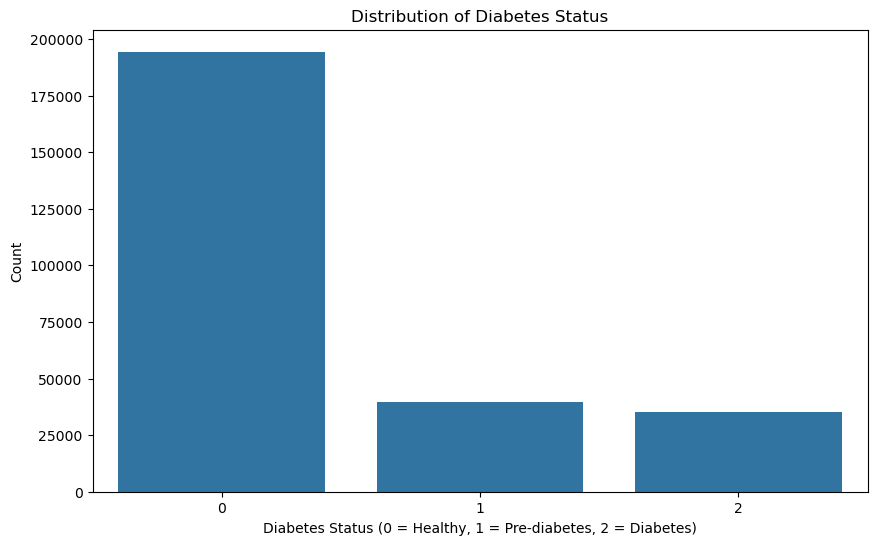

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes_Status', data=df_combined)
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes Status (0 = Healthy, 1 = Pre-diabetes, 2 = Diabetes)')
plt.ylabel('Count')
plt.show()

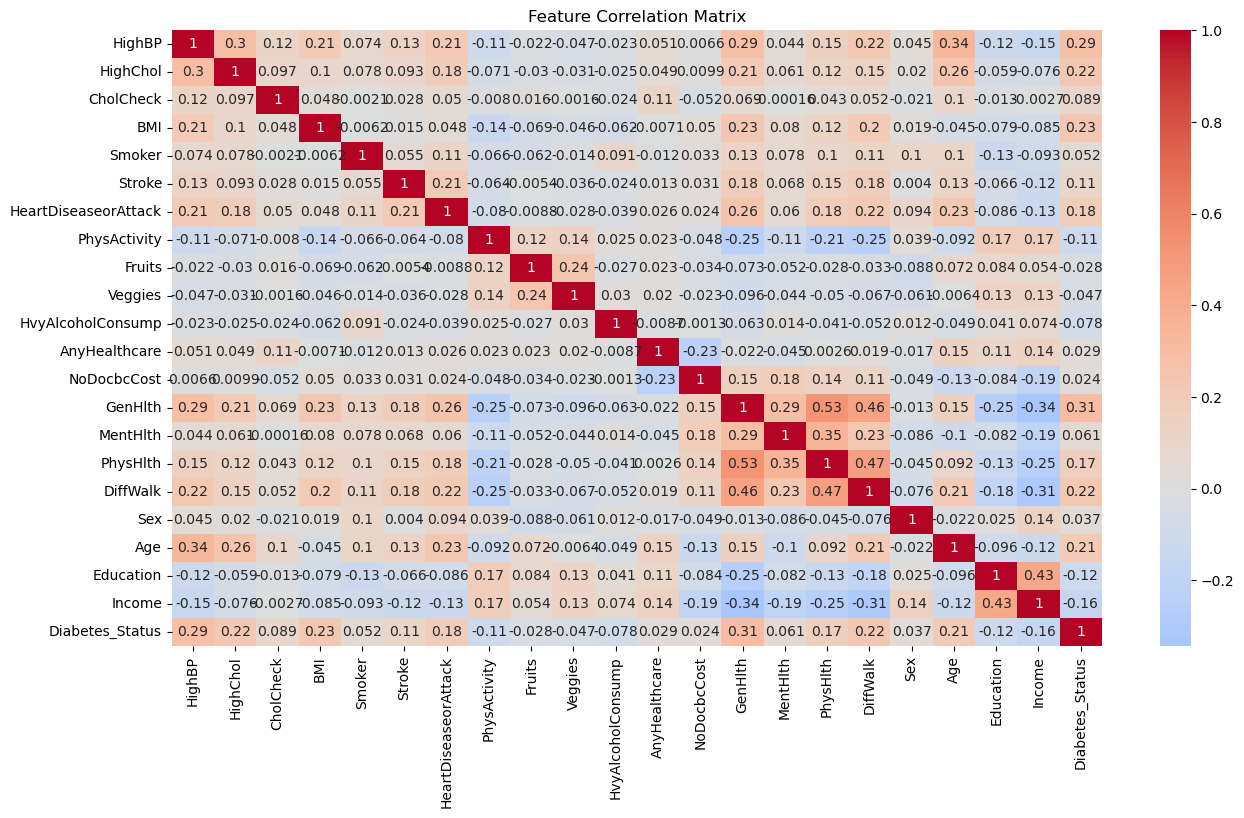

In [33]:
# Correlation matrix to visualize pair correlation coefficient between every pair of features in the dataset
# (Correlation measures how much 2 variables tend to change together)
plt.figure(figsize=(15, 8))
corr = df_combined.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0) # annot = True to show numbers on each square
plt.title('Feature Correlation Matrix')
plt.show()

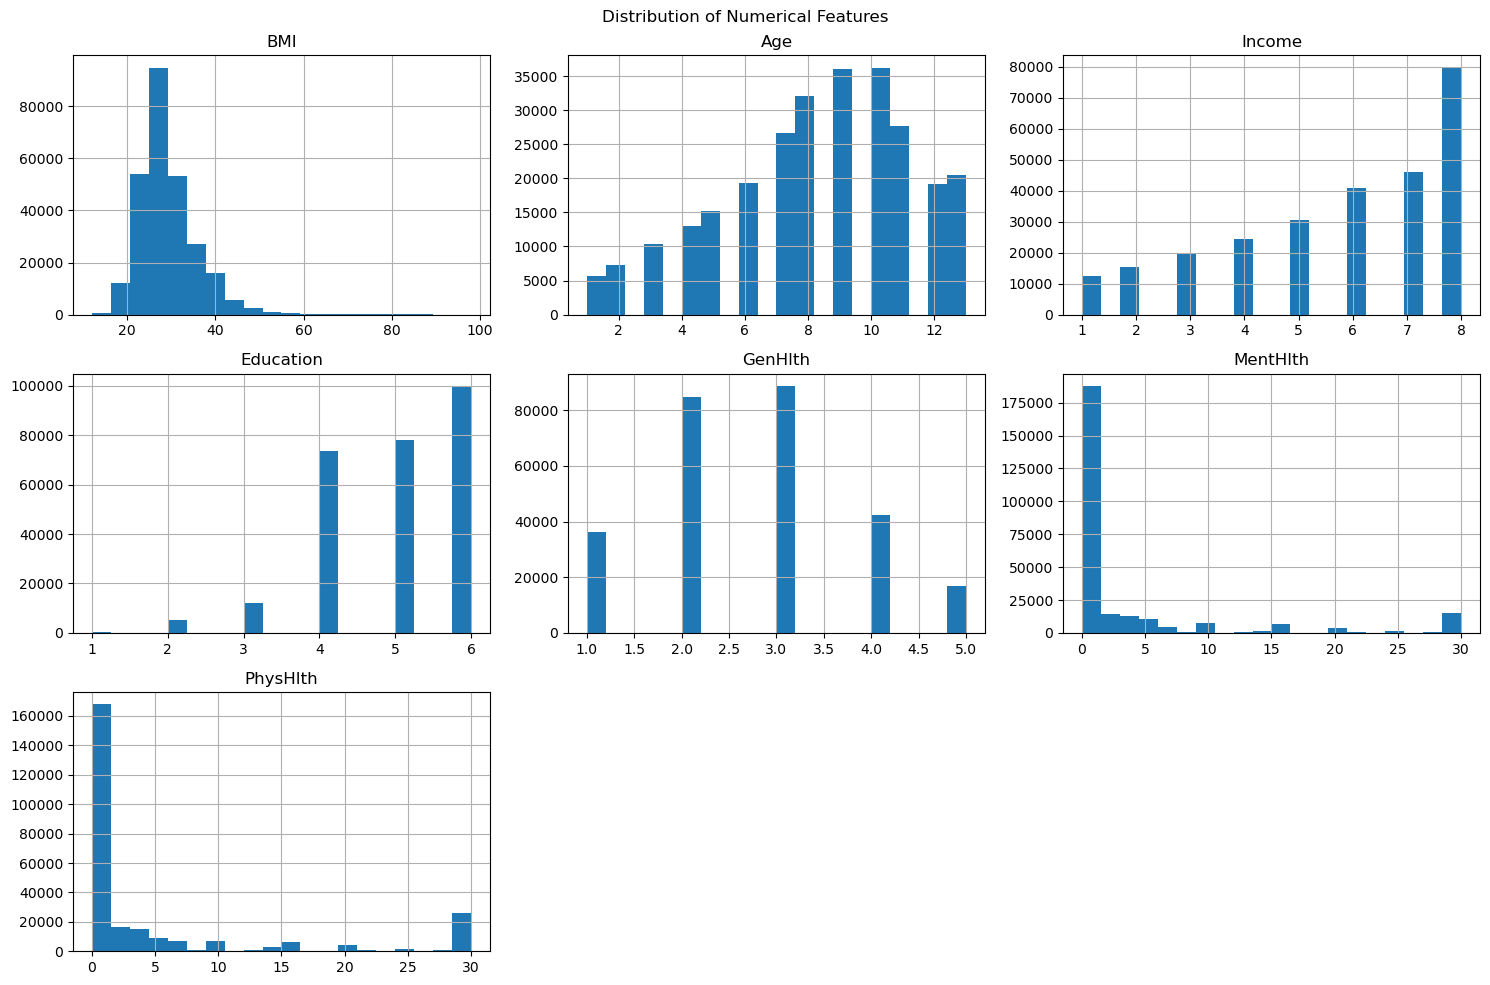

In [34]:
# Distribution of numerical features
numerical_features = ['BMI', 'Age', 'Income', 'Education', 'GenHlth', 'MentHlth', 'PhysHlth']
df_combined[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

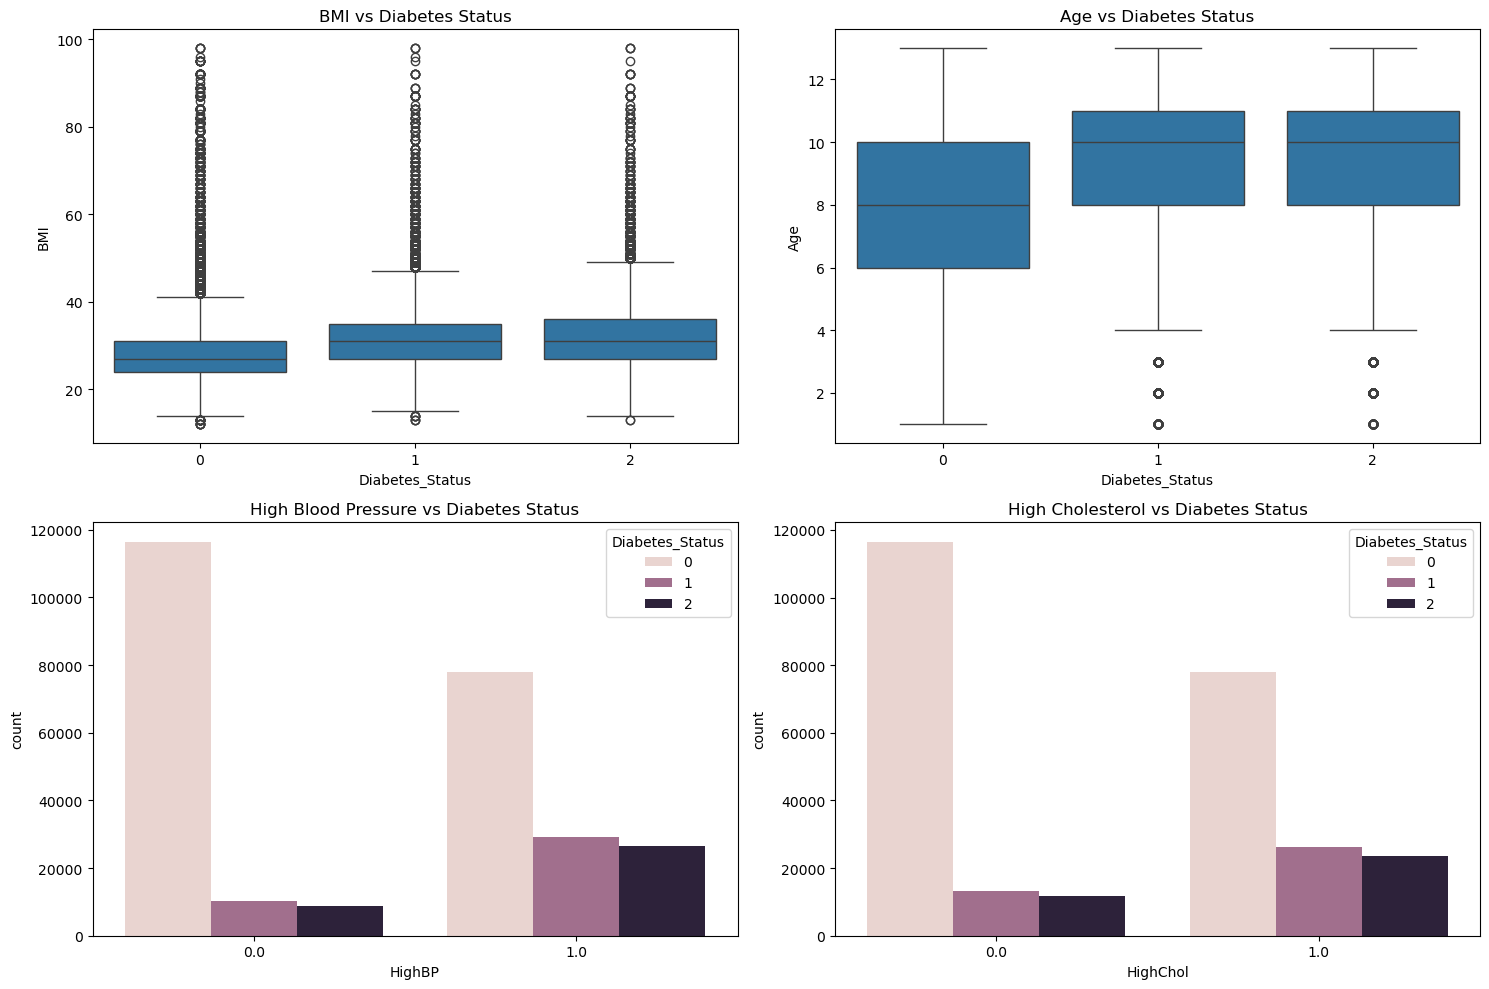

In [35]:
# Relationship between key features and diabetes status
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Diabetes_Status', y='BMI', data=df_combined)
plt.title('BMI vs Diabetes Status')

plt.subplot(2, 2, 2)
sns.boxplot(x='Diabetes_Status', y='Age', data=df_combined)
plt.title('Age vs Diabetes Status')

plt.subplot(2, 2, 3)
sns.countplot(x='HighBP', hue='Diabetes_Status', data=df_combined)
plt.title('High Blood Pressure vs Diabetes Status')

plt.subplot(2, 2, 4)
sns.countplot(x='HighChol', hue='Diabetes_Status', data=df_combined)
plt.title('High Cholesterol vs Diabetes Status')

plt.tight_layout()
plt.show()

# Data PreProcessing

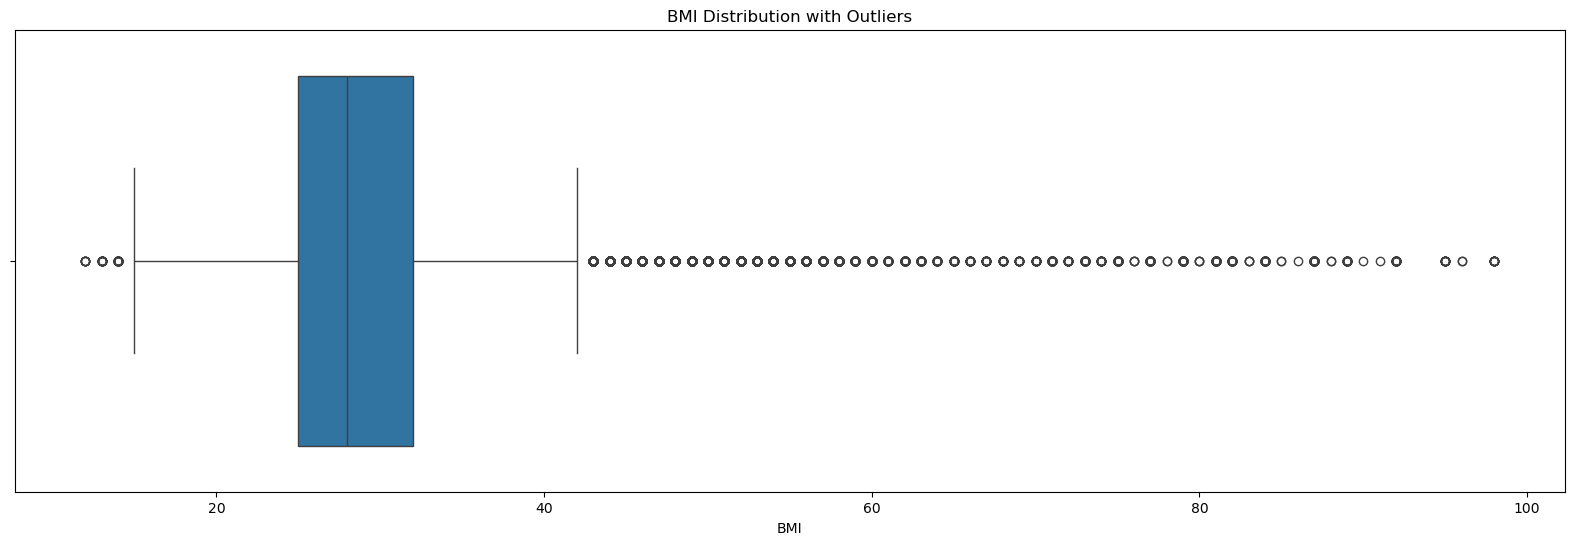

In [37]:
# Handle outliers (using BMI as an example)
plt.figure(figsize=(20, 6))
sns.boxplot(x=df_combined['BMI'])
plt.title('BMI Distribution with Outliers')
plt.show()

In [38]:
# Identify numerical features (excluding binary)
numerical_features = df_combined.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()

# Remove binary features (0/1) from numerical features list
binary_features = [col for col in numerical_features if sorted(df_combined[col].unique()) in [[0,1], [0], [1]]]
numerical_features = [col for col in numerical_features if col not in binary_features]

print("Numerical features to analyze for outliers:")
print(numerical_features)

Numerical features to analyze for outliers:
['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income', 'Diabetes_Status']


In [39]:
# Function to detect outliers using IQR method
def detect_outliers(df_combined, feature):
    Q1 = df_combined[feature].quantile(0.25)
    Q3 = df_combined[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_combined[(df_combined[feature] < lower_bound) | (df_combined[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect and display outliers for each numerical feature
outliers_report = {} # Empty dictionary to know how many outliers we have, calculated lower/upper bounds, & min/max values
for feature in numerical_features:
    outliers, lower_bound, upper_bound = detect_outliers(df_combined, feature)
    outliers_report[feature] = {
        'outliers_count': len(outliers),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'min_value': df_combined[feature].min(),
        'max_value': df_combined[feature].max()
    }

# Create a DataFrame for the outliers report
outliers_df = pd.DataFrame(outliers_report).T # converts the dictionary into a pandas DataFrame, then transposes it
outliers_df['percentage_outliers'] = (outliers_df['outliers_count'] / len(df_combined)) * 100
print("\nOutliers Report:")
print("================")
print(outliers_df.sort_values('outliers_count', ascending=False))


Outliers Report:
                 outliers_count  lower_bound  upper_bound  min_value  \
MentHlth                44084.0         -3.0          5.0        0.0   
PhysHlth                44030.0         -7.5         12.5        0.0   
GenHlth                 17005.0          0.5          4.5        1.0   
BMI                     11356.0         14.5         42.5       12.0   
Age                         0.0         -1.5         18.5        1.0   
Education                   0.0          1.0          9.0        1.0   
Income                      0.0         -2.0         14.0        1.0   
Diabetes_Status             0.0         -1.5          2.5        0.0   

                 max_value  percentage_outliers  
MentHlth              30.0            16.380127  
PhysHlth              30.0            16.360063  
GenHlth                5.0             6.318484  
BMI                   98.0             4.219506  
Age                   13.0             0.000000  
Education              6.0       

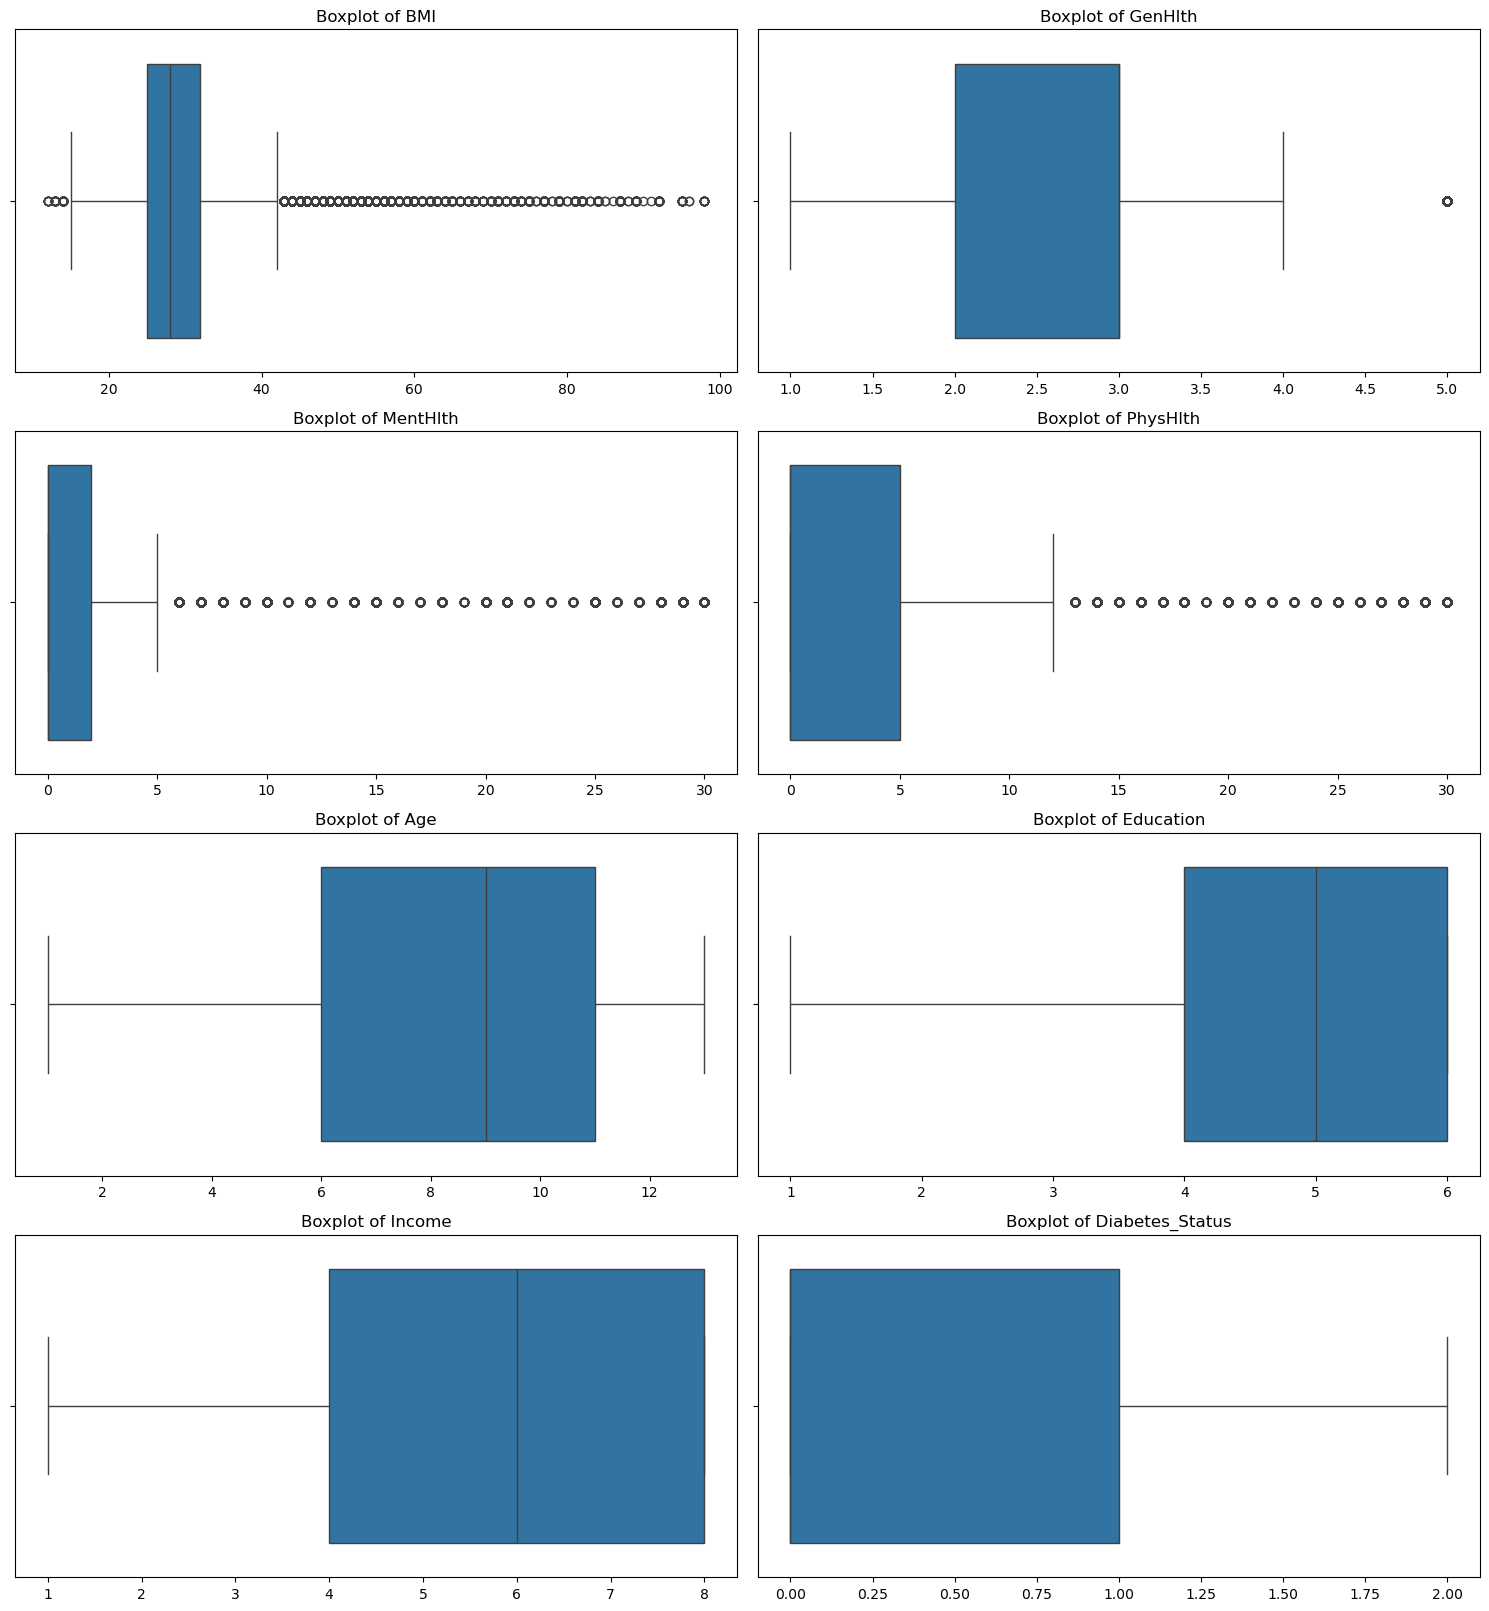

In [40]:
# Creating boxplots for all numerical features to visualize outliers
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//2 + 1, 2, i)
    sns.boxplot(x=df_combined[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

# Outlier Treatment:

In [42]:
# Method 1: Capping (Winsorization by limiting extreme values to specified thresholds)
def cap_outliers(df_combined, feature, lower_bound, upper_bound):
    df_combined[feature] = np.where(df_combined[feature] < lower_bound, lower_bound, df_combined[feature])
    df_combined[feature] = np.where(df_combined[feature] > upper_bound, upper_bound, df_combined[feature])
    return df_combined

In [43]:
# Method 2: Trimming (Removal of rows that contain outliers)
def trim_outliers(de_combined, feature, lower_bound, upper_bound):
    return de_combined[(de_combined[feature] >= lower_bound) & (de_combined[feature] <= upper_bound)]

In [44]:
# Method 3: Transformation (using Log to reduce the impact of outliers by compressing large values.)
def log_transform(df_combined, feature):
    # Add 1 to avoid log(0), which equals undefined
    df_combined[feature] = np.log1p(df_combined[feature])
    return df_combined

In [45]:
df_clean = df_combined.copy()

# Define treatment strategy for each feature
# cap_iqr: Cap values using IQR method: replace outliers with calculated lower and upper bounds
# cap_natural: Cap using known natural limits (e.g., mental/physical health days max at 30)
treatment_strategy = {
    'BMI': 'cap_iqr',       # Cap at IQR-defined reasonable limits
    'MentHlth': 'cap_natural', # Mental health days - cap at natural max (30)
    'PhysHlth': 'cap_natural', # Physical health days - cap at natural max (30)
    'Age': 'cap_iqr',       # Age categories, IQR capping should be fine
    'Education': 'cap_iqr', # Education levels, IQR capping should be fine
    'Income': 'cap_iqr',    # Income categories, IQR capping should be fine
    'GenHlth': 'cap_natural' # General health has fixed scale (1-5), cap at 5
}

# Apply the treatment
for feature in numerical_features:
    _, iqr_lower_bound, iqr_upper_bound = detect_outliers(df_clean, feature)
    
    strategy = treatment_strategy.get(feature)

    if strategy == 'cap_iqr':
        # Use IQR bounds for capping
        df_clean = cap_outliers(df_clean, feature, iqr_lower_bound, iqr_upper_bound)
    elif strategy == 'cap_natural':
        # Cap at natural limits or IQR, whichever is more restrictive within natural bounds
        natural_min = 0 # Assuming 0 for days features, 1 for GenHlth
        natural_max = 30 # For MentHlth, PhysHlth
        
        if feature == 'GenHlth':
            natural_min = 1
            natural_max = 5
            
        # Effective lower bound: max of natural_min and iqr_lower_bound
        # Effective upper bound: min of natural_max and iqr_upper_bound
        effective_lower_bound = max(natural_min, iqr_lower_bound)
        effective_upper_bound = min(natural_max, iqr_upper_bound)
        
        df_clean = cap_outliers(df_clean, feature, effective_lower_bound, effective_upper_bound)
        
    elif strategy == 'trim':
        df_clean = trim_outliers(df_clean, feature, iqr_lower_bound, iqr_upper_bound)
    elif strategy == 'log':
        df_clean = log_transform(df_clean, feature)
    else:
        # Default to IQR capping if no specific strategy
        df_clean = cap_outliers(df_clean, feature, iqr_lower_bound, iqr_upper_bound)

print("Outlier treatment completed.")
print(f"Shape of df_clean after outlier treatment: {df_clean.shape}")

Outlier treatment completed.
Shape of df_clean after outlier treatment: (269131, 22)


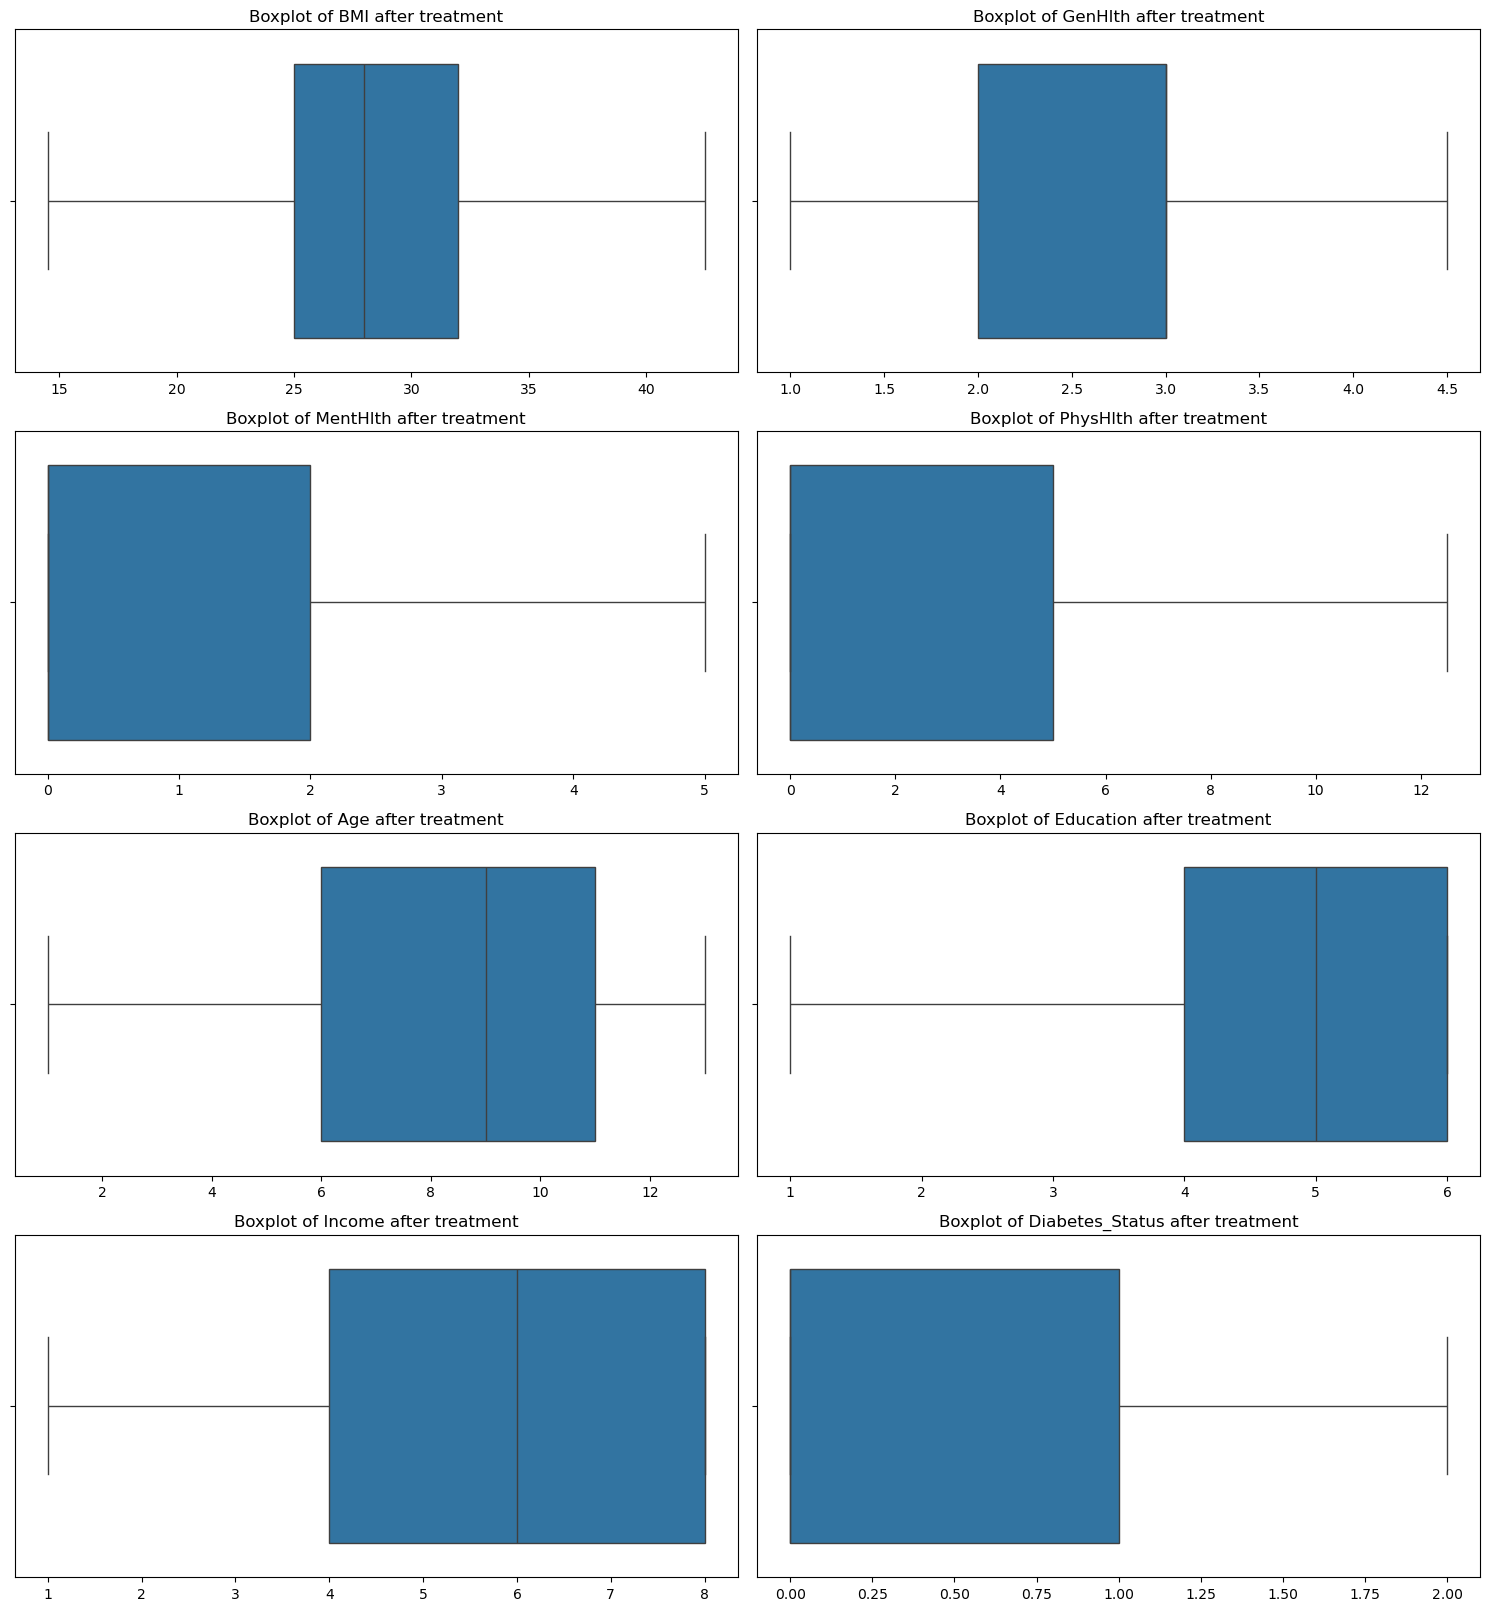

In [46]:
# Verify outlier treatment by checking the new distributions
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//2 + 1, 2, i)
    sns.boxplot(x=df_clean[feature])
    plt.title(f'Boxplot of {feature} after treatment')
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [47]:
# Compare statistics before and after treatment
print("\nComparison of statistics before and after outlier treatment:")
print("=============================================================")
for feature in numerical_features:
    print(f"\nFeature: {feature}")
    print("Before treatment:")
    print(f"Min: {df_combined[feature].min():.2f}, Max: {df_combined[feature].max():.2f}, Mean: {df_combined[feature].mean():.2f}")
    print("After treatment:")
    print(f"Min: {df_clean[feature].min():.2f}, Max: {df_clean[feature].max():.2f}, Mean: {df_clean[feature].mean():.2f}")


Comparison of statistics before and after outlier treatment:

Feature: BMI
Before treatment:
Min: 12.00, Max: 98.00, Mean: 29.15
After treatment:
Min: 14.50, Max: 42.50, Mean: 28.85

Feature: GenHlth
Before treatment:
Min: 1.00, Max: 5.00, Mean: 2.70
After treatment:
Min: 1.00, Max: 4.50, Mean: 2.67

Feature: MentHlth
Before treatment:
Min: 0.00, Max: 30.00, Mean: 3.66
After treatment:
Min: 0.00, Max: 5.00, Mean: 1.31

Feature: PhysHlth
Before treatment:
Min: 0.00, Max: 30.00, Mean: 5.14
After treatment:
Min: 0.00, Max: 12.50, Mean: 3.09

Feature: Age
Before treatment:
Min: 1.00, Max: 13.00, Mean: 8.27
After treatment:
Min: 1.00, Max: 13.00, Mean: 8.27

Feature: Education
Before treatment:
Min: 1.00, Max: 6.00, Mean: 4.94
After treatment:
Min: 1.00, Max: 6.00, Mean: 4.94

Feature: Income
Before treatment:
Min: 1.00, Max: 8.00, Mean: 5.79
After treatment:
Min: 1.00, Max: 8.00, Mean: 5.79

Feature: Diabetes_Status
Before treatment:
Min: 0.00, Max: 2.00, Mean: 0.41
After treatment:
Min: 

In [48]:
df_clean.shape

(269131, 22)

# Training-Testing
#### We will be using 80% for Training, and 20% for Testing.

In [50]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) from the outlier-treated data
X = df_clean.drop("Diabetes_Status", axis=1)
y = df_clean["Diabetes_Status"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shape of the splits
print("Training set shape (before scaling/SMOTE):", X_train.shape, y_train.shape)
print("Testing set shape (before scaling):", X_test.shape, y_test.shape)
print("\nDistribution of target in y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of target in y_test:")
print(y_test.value_counts(normalize=True))

Training set shape (before scaling/SMOTE): (215304, 21) (215304,)
Testing set shape (before scaling): (53827, 21) (53827,)

Distribution of target in y_train:
Diabetes_Status
0.0    0.722239
1.0    0.147350
2.0    0.130411
Name: proportion, dtype: float64

Distribution of target in y_test:
Diabetes_Status
0.0    0.722240
1.0    0.147361
2.0    0.130399
Name: proportion, dtype: float64


# Encoding
#### It's the process of converting categorical data into a numerical format, making it suitable for use in machine learning algorithms.
#### No need for encoding since our dataset is numerical, not categorical.

# Scaling
#### Used to adjust the range or distribution of numerical features.

In [53]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit the scaler on the training data ONLY and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames (useful for inspection and some libraries)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nAfter Standard Scaling (Training Data Describe):")
print(X_train_scaled_df.describe().loc[['mean', 'std']])

print("\nAfter Standard Scaling (Testing Data Describe - should not be exactly 0 mean/1 std):")
print(X_test_scaled_df.describe().loc[['mean', 'std']])


After Standard Scaling (Training Data Describe):
            HighBP      HighChol     CholCheck           BMI        Smoker  \
mean  4.501450e-17 -1.679793e-17  1.956514e-16  9.184411e-17  1.119752e-16   
std   1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   

            Stroke  HeartDiseaseorAttack  PhysActivity        Fruits  \
mean -5.296795e-17         -3.042769e-17 -8.580477e-17 -9.478127e-17   
std   1.000002e+00          1.000002e+00  1.000002e+00  1.000002e+00   

           Veggies  ...  AnyHealthcare   NoDocbcCost       GenHlth  \
mean  1.155642e-16  ...  -1.968560e-16 -2.260626e-18 -1.004246e-16   
std   1.000002e+00  ...   1.000002e+00  1.000002e+00  1.000002e+00   

          MentHlth      PhysHlth      DiffWalk           Sex           Age  \
mean -3.980021e-17  5.544308e-18  2.696250e-17 -3.828213e-17  2.044134e-16   
std   1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   

         Education        Income  
mean -1.893480e-1

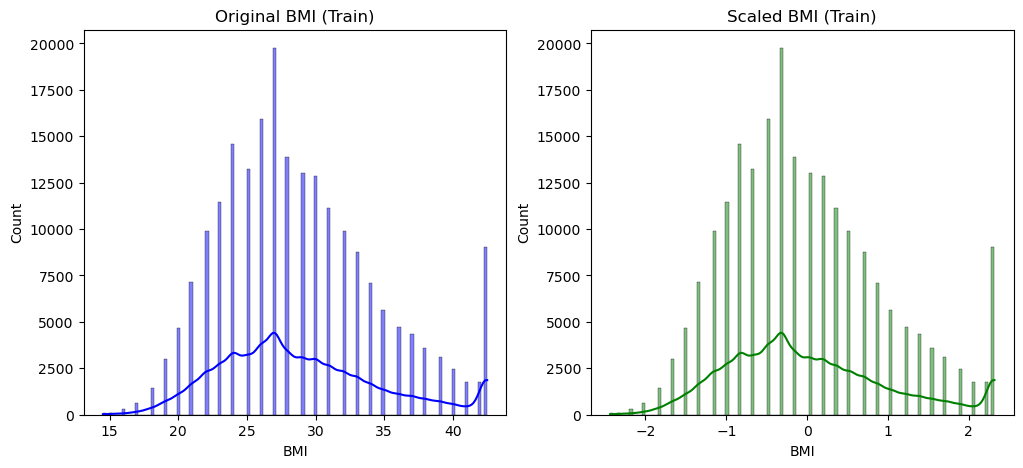

In [54]:
# Example for BMI:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(X_train['BMI'], kde=True, color='blue')
plt.title('Original BMI (Train)')
plt.subplot(1, 2, 2)
sns.histplot(X_train_scaled_df['BMI'], kde=True, color='green')
plt.title('Scaled BMI (Train)')
plt.show()

In [55]:
# Verify cleaned data structure
print("Cleaned Data Overview:")
print(f"Shape: {df_clean.shape}")
print("\nData Types:")
print(df_clean.dtypes)
print("\nTarget Variable Distribution:")
print(df_clean['Diabetes_Status'].value_counts())

Cleaned Data Overview:
Shape: (269131, 22)

Data Types:
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
Diabetes_Status         float64
dtype: object

Target Variable Distribution:
Diabetes_Status
0.0    194377
1.0     39657
2.0     35097
Name: count, dtype: int64


In [56]:
# Separate features (X) and target (y)
X = df_clean.drop('Diabetes_Status', axis=1)
y = df_clean['Diabetes_Status']

# Verify all features are numerical (except target)
assert all(X.dtypes == 'float64'), "Non-float64 features detected!"

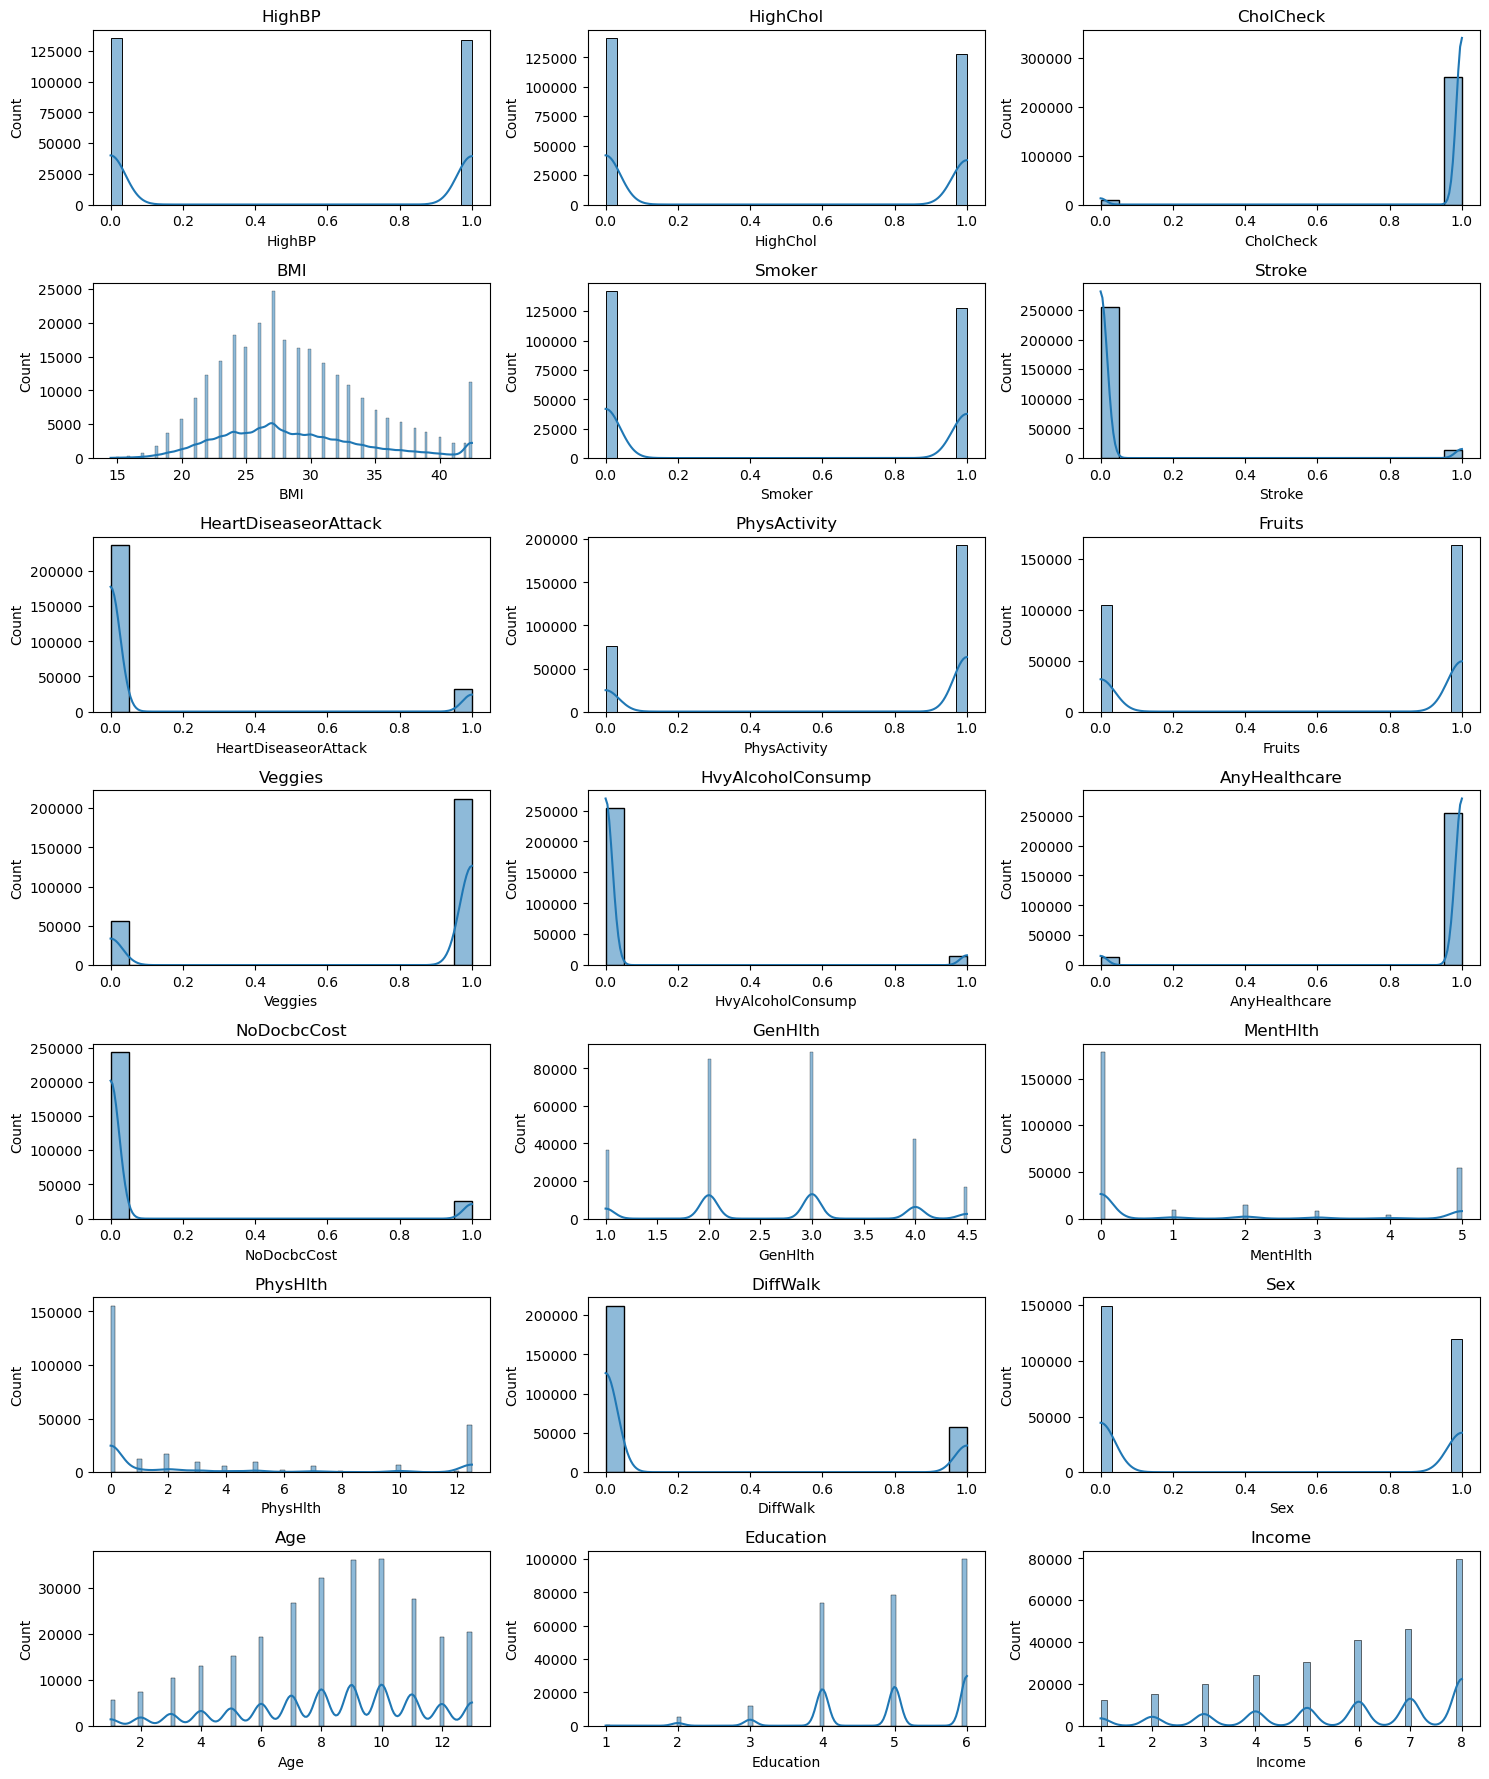

In [57]:
# Analyze feature distributions to choose scalers
plt.figure(figsize=(15, 20))
for i, col in enumerate(X.columns, 1):
    plt.subplot(len(X.columns)//3 + 1, 3, i)
    sns.histplot(X[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Class Imbalance

In [59]:
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [60]:
# To check the class distribution
print(y_train.value_counts())

Diabetes_Status
0.0    155501
1.0     31725
2.0     28078
Name: count, dtype: int64


In [61]:
import psutil

physical_cores = psutil.cpu_count(logical=False)
print(f"Physical cores: {physical_cores}")

Physical cores: 6


In [62]:
# To solve the warning error of the physical cores
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "6"  # 6 is my actual physical core count

In [63]:
model = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
        random_state=42,
        max_depth=15,               # Slightly increased depth
        min_samples_split=20,       # More regularization
        class_weight='balanced',    # Added for extra imbalance handling
        # n_estimators=100
    ))
])

In [64]:
# Train and evaluate
model.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        min_samples_split=20,
                                        random_state=42))])

In [65]:
# Check overfitting
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
gap = train_acc - test_acc

# Get predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [66]:
# Performance metrics
print("\n=== Performance ===")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy:  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Gap:            {accuracy_score(y_train, y_train_pred) - accuracy_score(y_test, y_test_pred):.4f}")

# Class-specific metrics
print("\n=== Class-wise Performance ===")
print(classification_report(y_test, y_test_pred, target_names=['Healthy', 'Diabetes', 'Pre-Diabetes']))


=== Performance ===
Train Accuracy: 0.7196
Test Accuracy:  0.6910
Gap:            0.0286

=== Class-wise Performance ===
              precision    recall  f1-score   support

     Healthy       0.81      0.90      0.85     38876
    Diabetes       0.21      0.16      0.18      7932
Pre-Diabetes       0.22      0.15      0.17      7019

    accuracy                           0.69     53827
   macro avg       0.41      0.40      0.40     53827
weighted avg       0.64      0.69      0.66     53827



In [67]:
# Overfitting analysis
print("\nOverfitting Analysis:")
if (train_acc - test_acc) > 0.1:
    print("Warning: Potential overfitting (train accuracy significantly higher than test).")
elif (train_acc - test_acc) < -0.1:
    print("Test accuracy higher than train.")
else:
    print("No overfitting detected (small gap between train and test accuracy).")


Overfitting Analysis:
No overfitting detected (small gap between train and test accuracy).


# Learning Models Before class imbalance

In [69]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [70]:
# Print the shape of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (215304, 21)
Testing set shape: (53827, 21)


In [71]:
#Train & Compare Multiple Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    # "SVM": SVC()     # This model took a long time running in the kernel without reaching an output as the dataset is large and non linear
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.7280
Random Forest Accuracy: 0.6909
Decision Tree Accuracy: 0.6054
KNN Accuracy: 0.6957
Naive Bayes Accuracy: 0.6474


In [72]:
# Sort results by accuracy
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")


Best Model: Logistic Regression with Accuracy: 0.7280


In [73]:
#Continue Using the Best Model
# Re-instantiate and refit the best model
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# Generate classification report
from sklearn.metrics import classification_report, confusion_matrix
y_pred = best_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[37728  1135    13]
 [ 6478  1427    27]
 [ 5627  1360    32]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85     38876
         1.0       0.36      0.18      0.24      7932
         2.0       0.44      0.00      0.01      7019

    accuracy                           0.73     53827
   macro avg       0.52      0.38      0.37     53827
weighted avg       0.66      0.73      0.65     53827



Class distribution before balancing:
Diabetes_Status
0.0    0.722239
1.0    0.147352
2.0    0.130409
Name: proportion, dtype: float64


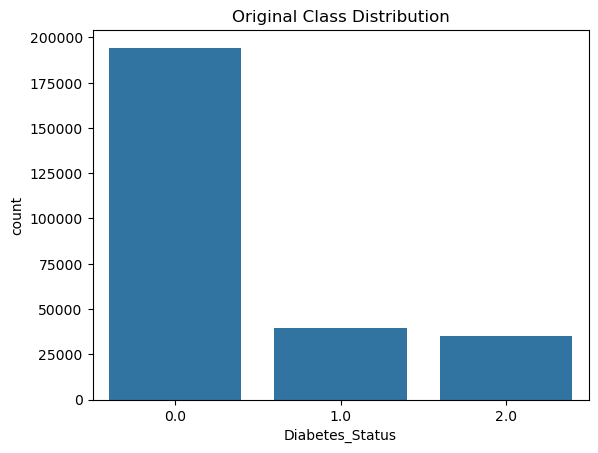

In [74]:
print("Class distribution before balancing:")
print(y.value_counts(normalize=True))
sns.countplot(x=y)
plt.title("Original Class Distribution")
plt.show()

In [75]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

Class distribution after balancing:
Diabetes_Status
0.0    0.333333
2.0    0.333333
1.0    0.333333
Name: proportion, dtype: float64


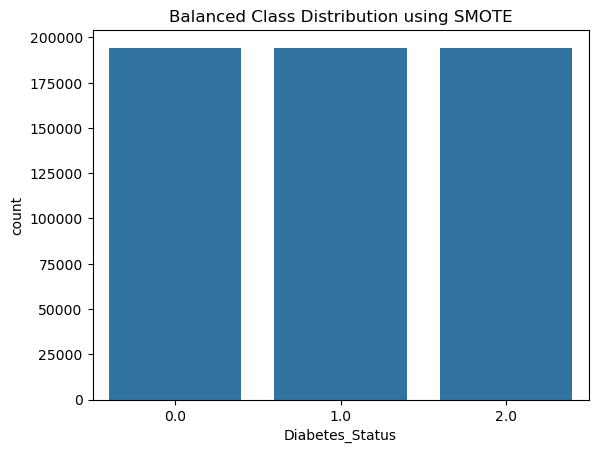

In [76]:
print("Class distribution after balancing:")
print(pd.Series(y_resampled).value_counts(normalize=True))
sns.countplot(x=y_resampled)
plt.title("Balanced Class Distribution using SMOTE")
plt.show()

<h1>Data distributing after balancing</h1>

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)


 Model: Logistic Regression
Confusion Matrix:
 [[27554  5176  6145]
 [ 9016  9645 20215]
 [ 8252  9414 21210]]
Train Accuracy: 0.4983
Test Accuracy: 0.5008
F1-Score: 0.4849
Sensitivity (Recall): N/A (not binary classification)
Specificity: N/A (not binary classification)
Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      0.71      0.66     38875
         1.0       0.40      0.25      0.31     38876
         2.0       0.45      0.55      0.49     38876

    accuracy                           0.50    116627
   macro avg       0.49      0.50      0.48    116627
weighted avg       0.49      0.50      0.48    116627



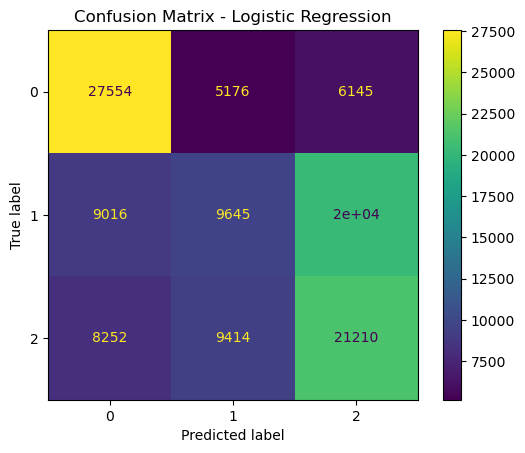



 Model: Random Forest
Confusion Matrix:
 [[36416  1709   750]
 [ 2001 16980 19895]
 [ 1073 19425 18378]]
Train Accuracy: 0.9431
Test Accuracy: 0.6154
F1-Score: 0.6141
Sensitivity (Recall): N/A (not binary classification)
Specificity: N/A (not binary classification)
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     38875
         1.0       0.45      0.44      0.44     38876
         2.0       0.47      0.47      0.47     38876

    accuracy                           0.62    116627
   macro avg       0.61      0.62      0.61    116627
weighted avg       0.61      0.62      0.61    116627



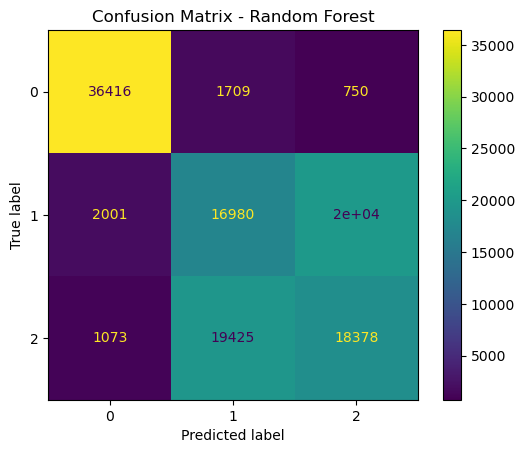



 Model: Decision Tree
Confusion Matrix:
 [[31960  5646  1269]
 [ 2241 16676 19959]
 [ 1189 20875 16812]]
Train Accuracy: 0.9431
Test Accuracy: 0.5612
F1-Score: 0.5681
Sensitivity (Recall): N/A (not binary classification)
Specificity: N/A (not binary classification)
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.82      0.86     38875
         1.0       0.39      0.43      0.41     38876
         2.0       0.44      0.43      0.44     38876

    accuracy                           0.56    116627
   macro avg       0.58      0.56      0.57    116627
weighted avg       0.58      0.56      0.57    116627



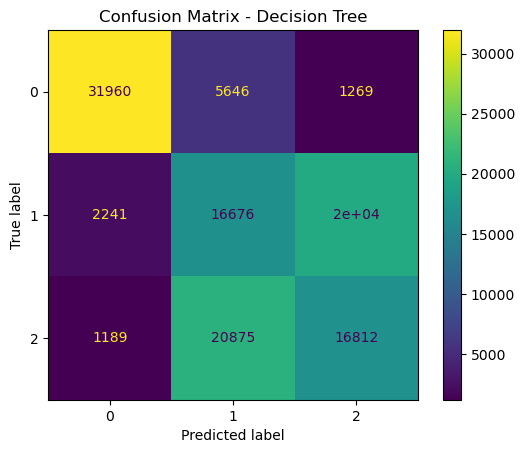



 Model: KNN
Confusion Matrix:
 [[24852  8439  5584]
 [  260 19173 19443]
 [   92 18091 20693]]
Train Accuracy: 0.7205
Test Accuracy: 0.5549
F1-Score: 0.5728
Sensitivity (Recall): N/A (not binary classification)
Specificity: N/A (not binary classification)
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.64      0.78     38875
         1.0       0.42      0.49      0.45     38876
         2.0       0.45      0.53      0.49     38876

    accuracy                           0.55    116627
   macro avg       0.62      0.55      0.57    116627
weighted avg       0.62      0.55      0.57    116627



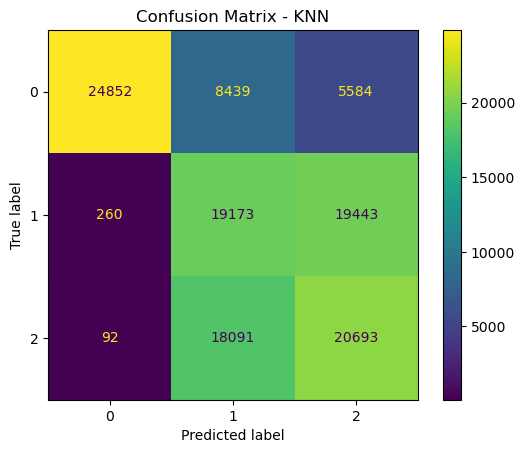



 Model: Naive Bayes
Confusion Matrix:
 [[23359  2703 12813]
 [ 6817  2516 29543]
 [ 6175  2399 30302]]
Train Accuracy: 0.4814
Test Accuracy: 0.4817
F1-Score: 0.4242
Sensitivity (Recall): N/A (not binary classification)
Specificity: N/A (not binary classification)
Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.60      0.62     38875
         1.0       0.33      0.06      0.11     38876
         2.0       0.42      0.78      0.54     38876

    accuracy                           0.48    116627
   macro avg       0.46      0.48      0.42    116627
weighted avg       0.46      0.48      0.42    116627



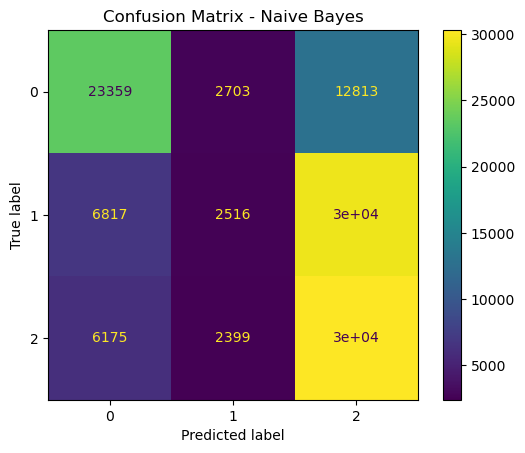

In [79]:
# Import evaluation metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    f1_score,
    classification_report,
    precision_recall_curve,
    ConfusionMatrixDisplay
)

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    # "SVM": SVC()     # This model took a long time running in the kernel without reaching an output as the dataset is large and non linear
}

# Train, evaluate, and plot for each model
for name, model in models.items():
    print(f"\n Model: {name}")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    # Sensitivity & Specificity
    if cm.shape == (2, 2):  # Binary only
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    else:
        sensitivity = specificity = "N/A (not binary classification)"
    
    # Evaluation metrics
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_pred)
    results[name] = acc_test
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"Train Accuracy: {acc_train:.4f}")
    print(f"Test Accuracy: {acc_test:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Sensitivity (Recall): {sensitivity}")
    print(f"Specificity: {specificity}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    print("\n=======================================")

In [80]:
# Sort results by accuracy
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")


Best Model: Random Forest with Accuracy: 0.6154


In [81]:
# Continue Using the Best Model
# Re-instantiate and refit the best model
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# Generate classification report
y_pred = best_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[36462  1696   717]
 [ 2025 16985 19866]
 [ 1086 19327 18463]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     38875
         1.0       0.45      0.44      0.44     38876
         2.0       0.47      0.47      0.47     38876

    accuracy                           0.62    116627
   macro avg       0.61      0.62      0.62    116627
weighted avg       0.61      0.62      0.62    116627

